In [87]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager
from matplotlib.patches import Rectangle, PathPatch
from matplotlib.textpath import TextPath
import matplotlib.transforms as mtrans
%matplotlib inline
MPL_BLUE = '#11557c'
ziti = mpl.font_manager.FontProperties(fname = '/Users/liuzaoqi/Desktop/可视化图鉴/font/calibri bold .ttf') 

In [88]:
def create_icon_axes(fig, ax_position, lw_bars, lw_grid, lw_border, rgrid):

    with plt.rc_context({'axes.edgecolor': MPL_BLUE,
                         'axes.linewidth': lw_border}):
        ax = fig.add_axes(ax_position, projection='polar')
        ax.set_axisbelow(True)

        N = 7
        arc = 2. * np.pi
        theta = np.arange(0.0, arc, arc / N)
        radii = np.array([2, 6, 8, 7, 4, 5, 8])
        width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
        bars = ax.bar(theta, radii, width=width, bottom=0.0, align='edge',
                      edgecolor='0.3', lw=lw_bars)
        for r, bar in zip(radii, bars):
            color = *cm.jet(r / 10.)[:3], 0.6 
            bar.set_facecolor(color)

        ax.tick_params(labelbottom=False, labeltop=False,
                       labelleft=False, labelright=False)

        ax.grid(lw=lw_grid, color='0.9')
        ax.set_rmax(9)
        ax.set_yticks(rgrid)

    
        ax.add_patch(Rectangle((0, 0), arc, 9.58,
                               facecolor='white', zorder=0,
                               clip_on=False, in_layout=False))
        return ax


In [89]:
def create_text_axes(fig, height_px):

    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_aspect("equal")
    ax.set_axis_off()

    path = TextPath((0, 0), "matplotlib", size=height_px * 0.8,
                    prop=ziti)

    angle = 4.25  # degrees
    trans = mtrans.Affine2D().skew_deg(angle, 0)

    patch = PathPatch(path, transform=trans + ax.transData, color=MPL_BLUE,
                      lw=0)
    ax.add_patch(patch)
    ax.autoscale()


In [90]:


def make_logo(height_px, lw_bars, lw_grid, lw_border, rgrid, with_text=False):

    dpi = 100
    height = height_px / dpi
    figsize = (5 * height, height) if with_text else (height, height)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.patch.set_alpha(0)

    if with_text:
        create_text_axes(fig, height_px)
    ax_pos = (0.535, 0.12, .17, 0.75) if with_text else (0.03, 0.03, .94, .94)
    ax = create_icon_axes(fig, ax_pos, lw_bars, lw_grid, lw_border, rgrid)

    return fig, ax

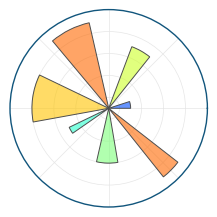

In [91]:
make_logo(height_px=210, lw_bars=0.7, lw_grid=0.5, lw_border=1,
          rgrid=[1, 3, 5, 7])
plt.show()

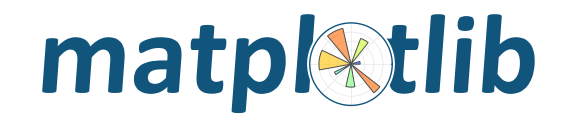

In [92]:
make_logo(height_px=110, lw_bars=0.7, lw_grid=0.5, lw_border=1,
          rgrid=[1, 3, 5, 7], with_text=True)
plt.show()